<a href="https://colab.research.google.com/github/njonge-nathan/Capstone-Data-Mining-the-Water-Table.ipynb/blob/main/Capstone_Data_Mining_the_Water_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining the Water Table**

# **1.0 Defining the Question**

## a) Specifying the Question

The main objective of this project is to predict the operating condition of a waterpoint (functional, non-functional and functional needs repair)  for each record in the dataset based on a number of variables about what kind of pump is operating, when it was installed and how it is managed.

## b) Defining the metric of success

To successfully predict the operating condition of a waterpoint (functional, non-functional and functional needs repair)  for each record in the dataset.

## c) Understanding the context

Using data from Taarifa[http://taarifa.org/] and the Tanzanian Ministry of Water[http://maji.go.tz/], can you predict which pumps are functional, which need some repairs, and which don't work at all? Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities.

## d) Recording the Experimental Design

* Importing the relevant libraries that we will use in our analysis
* Reading and exploring the dataset we will use for our project
* Defining the appropriateness of the available data with regards to the project
* Finding and dealing with outliers, anomalies, and missing data within the dataset.
* Performing univariate and bivariate analysis while recording our observations.
* Implementing the solution by using the various classifier algorithms to predict whether a waterpoint is functional,non functional or functional but needs repair based on the information provided.
* Challenging the solution by using a model that could outperform the best performing model identified earlier.
* Providing conclusions and recommendations based on the analysis  and various modelling techniques used in the project.

## e) Data Relevance

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private - The number of private wells an aquifer can provide water to.
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
 
> Labels
Distribution of Labels
The labels in this dataset are simple. There are three possible values:
* functional - the waterpoint is operational and there are no repairs needed
* functional needs repair - the waterpoint is operational, but needs repairs
* non functional - the waterpoint is not operational


# **2.0 Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

# **3.0 Loading the data**

In [5]:
# importing the train values dataset
train = pd.read_csv("/content/Training set values.csv")

# importing the train labels
labels = pd.read_csv("/content/Training set labels.csv")

# **4.0 Checking the dataset**

**Train dataset**

In [6]:
# previewing the first five rows
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
# previewing the last five rows
train.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


**Train labels dataset**

In [8]:
# previewing the first five rows 
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [9]:
# previewing the last five rows
labels.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


**Creating a new dataset by merging the train and labels dataset**

In [10]:
# merge the train values with the train labels
train_final = train.merge(labels , on='id')
train_final.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
df = train_final[['date_recorded','construction_year']]
df.head()

,date_recorded,construction_year
0,2011-03-14,1999
1,2013-03-06,2010
2,2013-02-25,2009
3,2013-01-28,1986
4,2011-07-13,0


In [12]:
# check the dimensions
print(f"Our dataset has {train_final.shape} rows and columns")

Our dataset has (59400, 41) rows and columns


In [13]:
# check the datatypes 
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [14]:
# check summary statistics
train_final.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [15]:
# check for unique values
categorical_variables = [ 'funder', 
       'installer',  'wpt_name', 
       'basin', 'subvillage', 'region',  'lga',
       'ward',  'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group']
for column in categorical_variables:
  print(column)
  print(train_final[column].nunique())
  print(train_final[column].unique())
  print('\n')

funder
1897
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']


installer
2145
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']


wpt_name
37400
['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']


basin
9
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


subvillage
19287
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


region
21
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


lga
125
['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamo

# **5.0 Tidying the Dataset**

## a) Validity

In [16]:
# drop scheme_name column
train_final.drop(["scheme_name"], axis=1, inplace=True)

In [17]:
# confirming the column has been dropped
train_final.head(0)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


## **b) Completeness**

In [18]:
# check for percentage of null values in each column
(train_final.isna().sum()/train_final.shape[0])*100

id                       0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   6.119529
gps_height               0.000000
installer                6.153199
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000000
num_private              0.000000
basin                    0.000000
subvillage               0.624579
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           5.612795
recorded_by              0.000000
scheme_management        6.526936
permit                   5.144781
construction_year        0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment                  0.000000
payment_type  

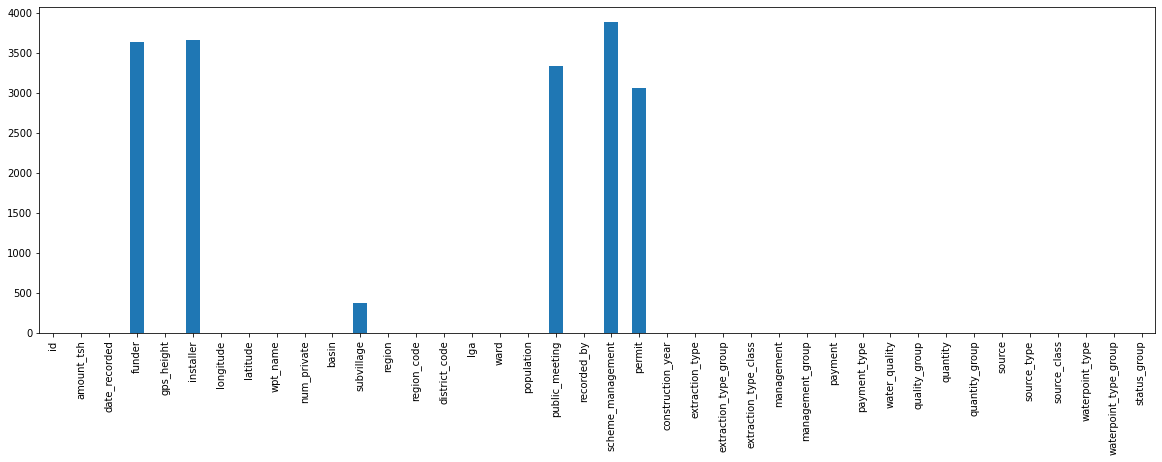

In [19]:
# visualizing our null values
train_final.isna().sum().plot(kind="bar",figsize=(20,6))
plt.show()

In [20]:
# drop rows with null values
train_final = train_final.dropna()
# confirming that the missing values have been dropped
train_final.isna().sum().sum()

0

## **c) Consistency**

In [21]:
# checking if our dataset has any duplicated values
train_final.duplicated().value_counts()

False    48288
dtype: int64

There were no duplicates in our dataset

## **d) Uniformity**

In [22]:
# checking our columns for uniformity
train_final.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [23]:
# changing the column names 
train_final = train_final.rename(columns = {"amount_tsh":"amount_water_available","num_private":"no_privatewells_aquifer","lga":"local_gvt_auth","gps_height":"altitude_of_well"})
# confirming that the columns names have changed
train_final.columns

Index(['id', 'amount_water_available', 'date_recorded', 'funder',
       'altitude_of_well', 'installer', 'longitude', 'latitude', 'wpt_name',
       'no_privatewells_aquifer', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'local_gvt_auth', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [24]:
# convert date from object to date time datatype
train_final['date_recorded'] = train_final['date_recorded'].apply(pd.to_datetime)

In [25]:
# confirming dtypes has been changed
train_final['date_recorded'].dtypes

dtype('<M8[ns]')

In [26]:
# convert category columns to category datatype
for col in ['funder', 'installer',  'wpt_name', 'basin', 'subvillage', 'region',  'local_gvt_auth', 'ward',
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']:

    train_final[col] = train_final[col].astype('category')

In [27]:
# confirming dtypes has been changed
train_final[['funder', 'installer',  'wpt_name', 'basin', 'subvillage', 'region',  'local_gvt_auth', 'ward',
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']].dtypes

funder                   category
installer                category
wpt_name                 category
basin                    category
subvillage               category
region                   category
local_gvt_auth           category
ward                     category
public_meeting           category
recorded_by              category
scheme_management        category
permit                   category
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment                  category
payment_type             category
water_quality            category
quality_group            category
quantity                 category
quantity_group           category
source                   category
source_type              category
source_class             category
waterpoint_type          category
waterpoint_type_group    category
status_group             category
dtype: object

## e) Accuracy

In [28]:
# checking if the amount of water availabe at a waterpoint is less than 0
(train_final[['amount_water_available','population','district_code','region_code','no_privatewells_aquifer']] < 0).sum()

amount_water_available     0
population                 0
district_code              0
region_code                0
no_privatewells_aquifer    0
dtype: int64

There were no values that were less than 0 

## e) Check for outliers

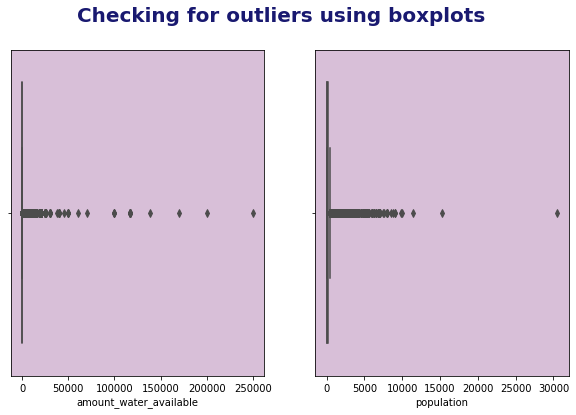

In [29]:
# checking for outliers in numerical columns
numerical_cols = train_final[['amount_water_available','population']]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='midnightblue')
for ax, data, column in zip(axes.flatten(),train_final,numerical_cols):
  sns.boxplot(train_final[column],ax=ax,palette='Set1')
  ax.set_facecolor('thistle')

We will not drop the outliers

# **6.0 Exploratory Data Analysis**

## **Univariate Analysis**

### **Histograms**

In [30]:
train_final.head(5)

,id,amount_water_available,date_recorded,funder,altitude_of_well,installer,longitude,latitude,wpt_name,no_privatewells_aquifer,basin,subvillage,region,region_code,district_code,local_gvt_auth,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


Histogram of Altitude of well

Text(0.5, 1.0, 'Histogram')

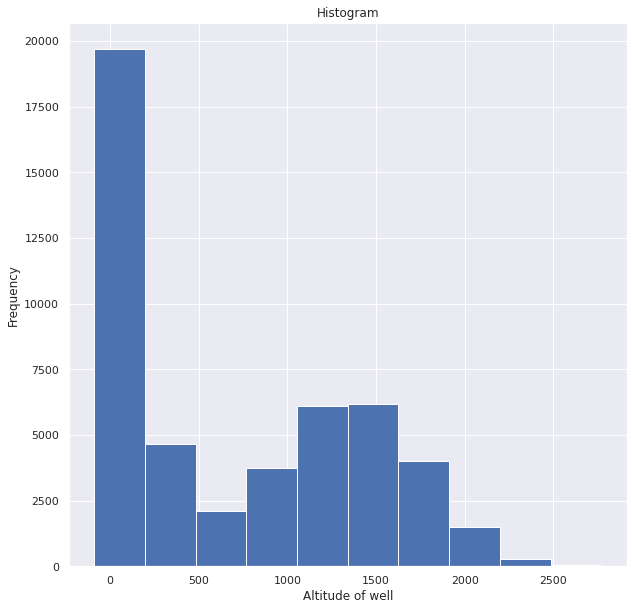

In [31]:
# Histogram of Altitude of well
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Altitude of well',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['altitude_of_well'].plot.hist().set_title('Histogram')

Text(0.5, 1.0, 'Histogram')

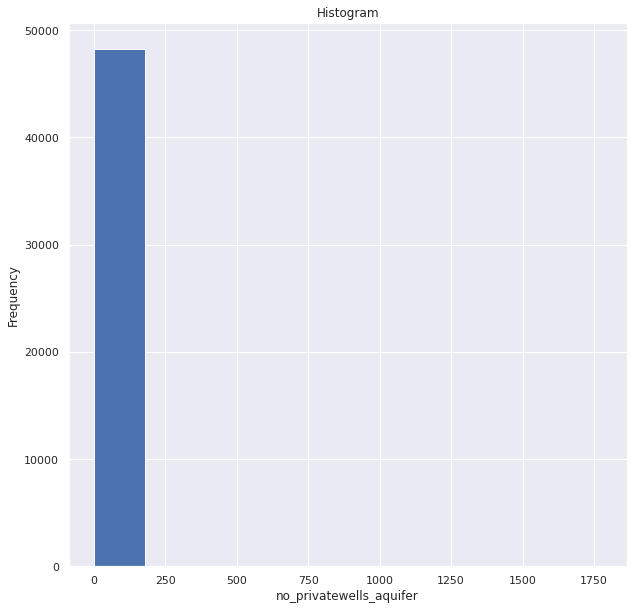

In [32]:
# Histogram of number privatewells aquifer
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('no_privatewells_aquifer',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['no_privatewells_aquifer'].plot.hist().set_title('Histogram')

Histogram of Amount of water available

Text(0.5, 1.0, 'Histogram')

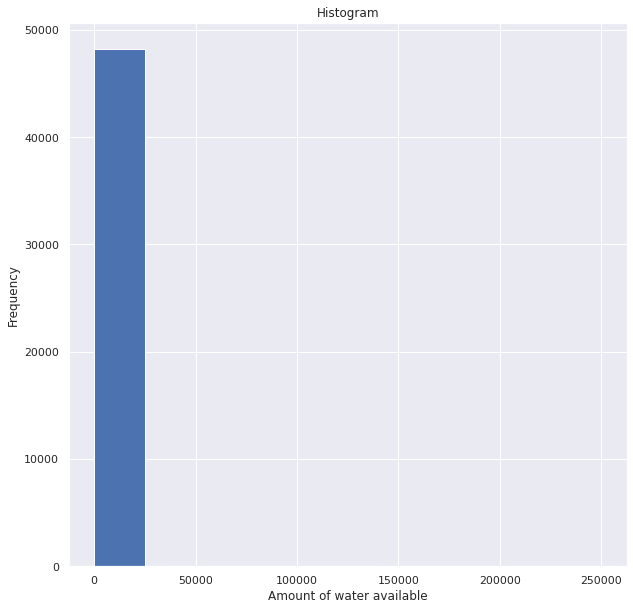

In [33]:
# Histogram of amount water available
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Amount of water available',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['amount_water_available'].plot.hist().set_title('Histogram')

Histogram of Population

Text(0.5, 1.0, 'Histogram')

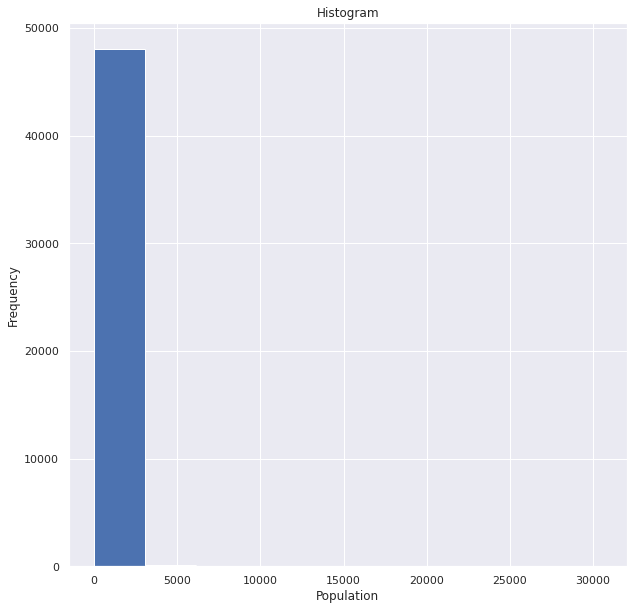

In [34]:
# Histogram of population
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Population',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))
train_final['population'].plot.hist().set_title('Histogram')

### **Countplot/Barplot**

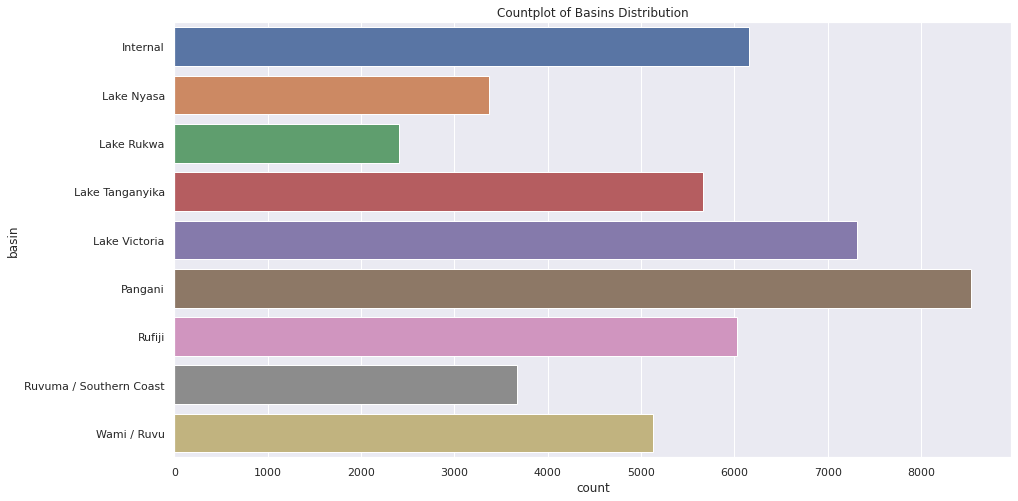

In [35]:
# Create a countplot of basins 
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(y ='basin',
              data=train_final).set_title("Countplot of Basins Distribution")
plt.show()

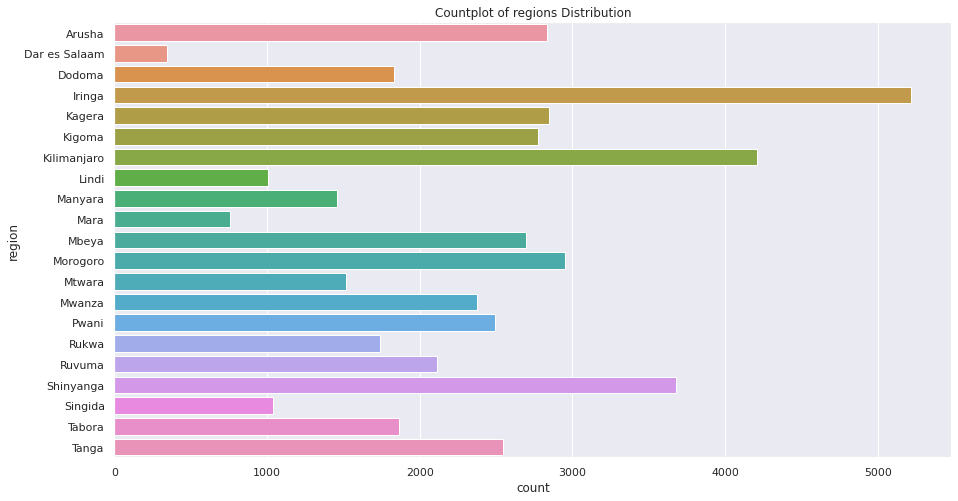

In [36]:
# countplot of region distributions
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(y='region', data=train_final).set_title("Countplot of regions Distribution")
plt.show()

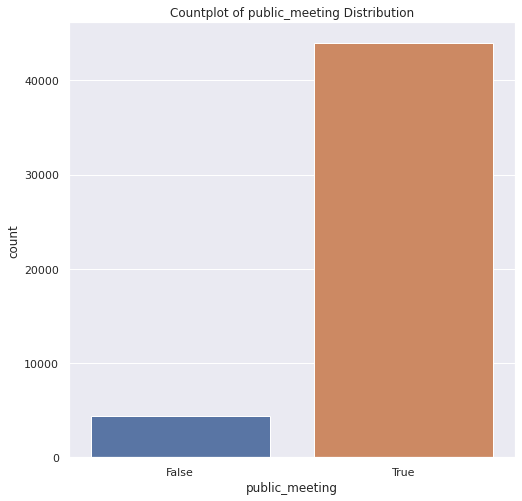

In [37]:
# countplot of public_meeting distributions
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x='public_meeting', data=train_final).set_title("Countplot of public_meeting Distribution")
plt.show()

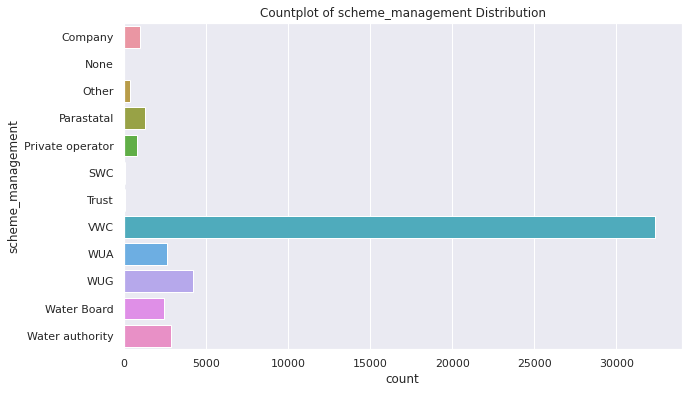

In [38]:
# countplot of scheme_management distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='scheme_management', data=train_final).set_title("Countplot of scheme_management Distribution")
plt.show()

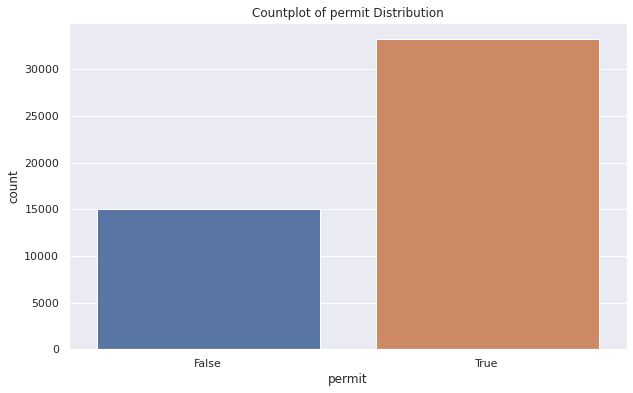

In [39]:
# countplot of permit distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='permit', data=train_final).set_title("Countplot of permit Distribution")
plt.show()

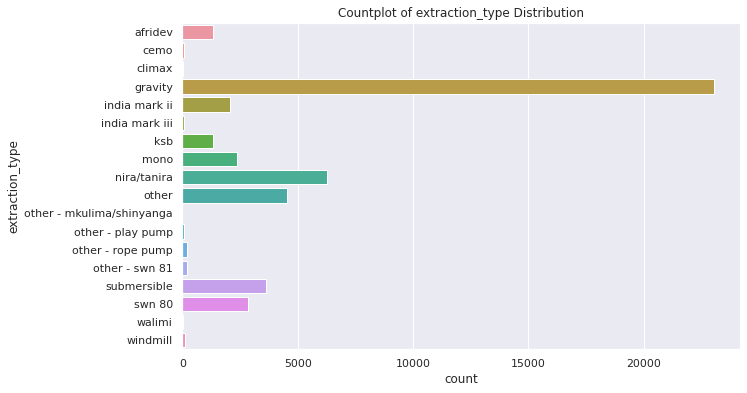

In [40]:
# countplot of extraction_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='extraction_type', data=train_final).set_title("Countplot of extraction_type Distribution")
plt.show()

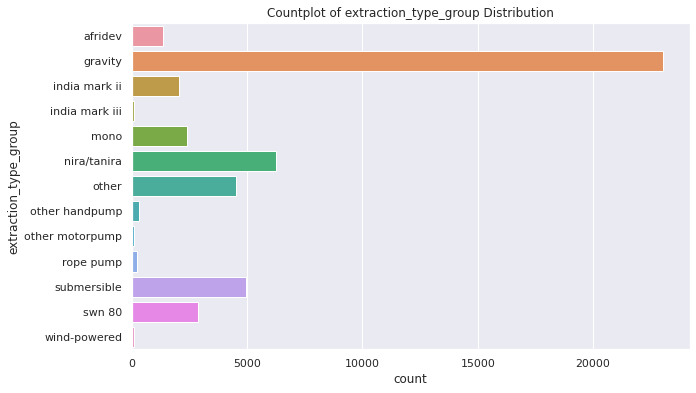

In [41]:
# countplot of extraction_type_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='extraction_type_group', data=train_final).set_title("Countplot of extraction_type_group Distribution")
plt.show()

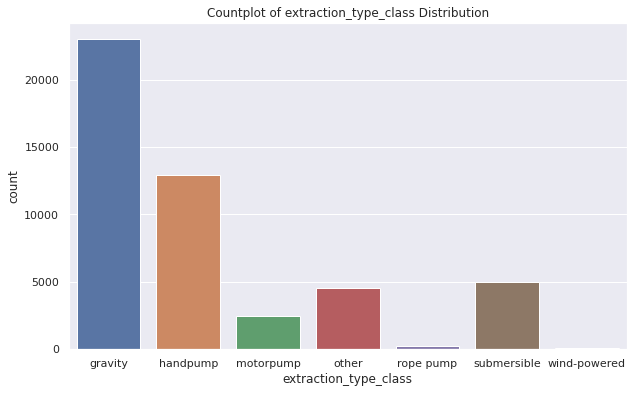

In [42]:
# countplot of extraction_type_class distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='extraction_type_class', data=train_final).set_title("Countplot of extraction_type_class Distribution")
plt.show()

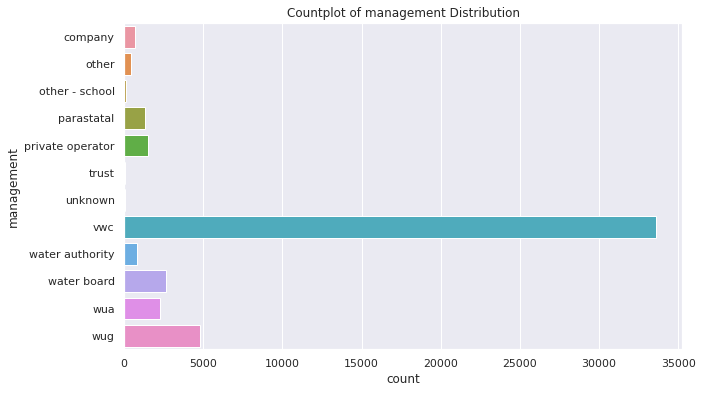

In [43]:
# countplot of management distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='management', data=train_final).set_title("Countplot of management Distribution")
plt.show()

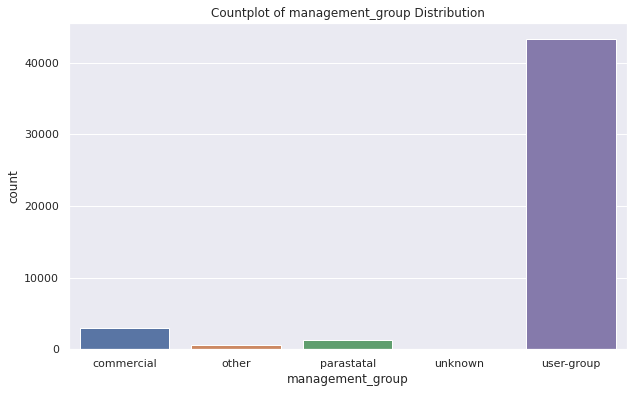

In [44]:
# countplot of management_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='management_group', data=train_final).set_title("Countplot of management_group Distribution")
plt.show()

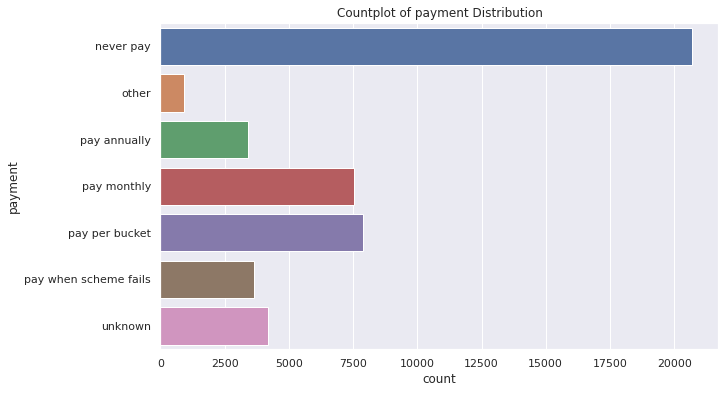

In [45]:
# countplot of payment distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='payment', data=train_final).set_title("Countplot of payment Distribution")
plt.show()

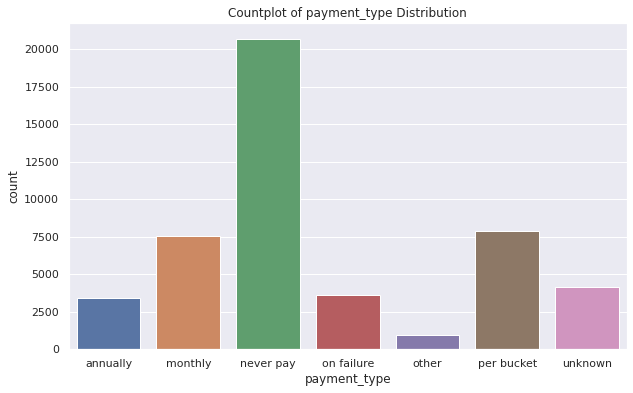

In [46]:
# countplot of payment_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='payment_type', data=train_final).set_title("Countplot of payment_type Distribution")
plt.show()

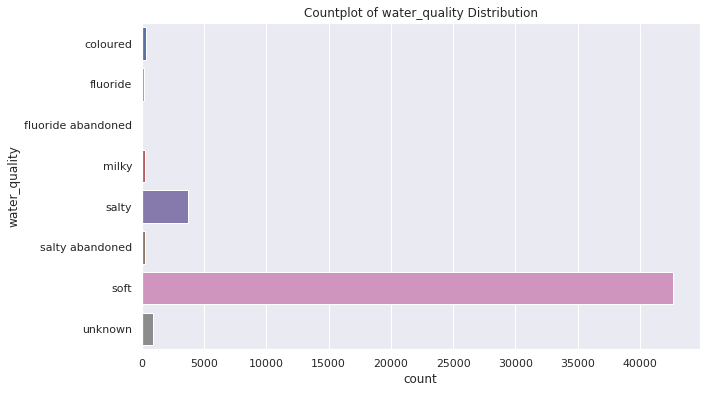

In [47]:
# countplot of water_quality distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='water_quality', data=train_final).set_title("Countplot of water_quality Distribution")
plt.show()

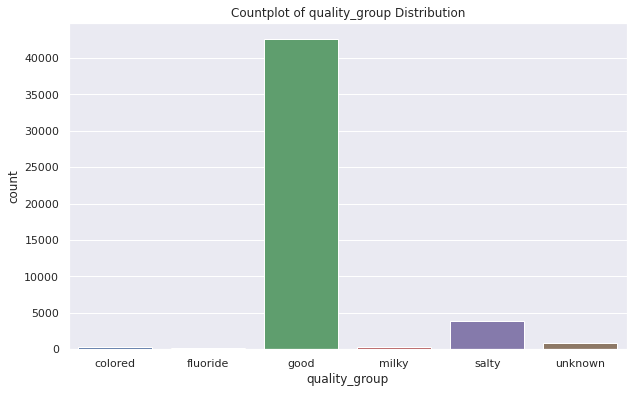

In [48]:
# countplot of quality_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quality_group', data=train_final).set_title("Countplot of quality_group Distribution")
plt.show()

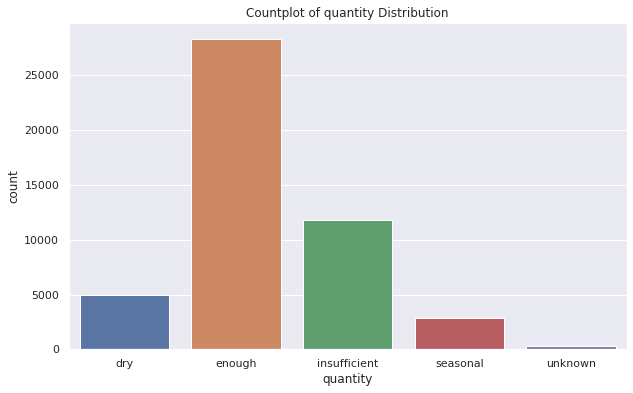

In [49]:
# countplot of quantity distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quantity', data=train_final).set_title("Countplot of quantity Distribution")
plt.show()

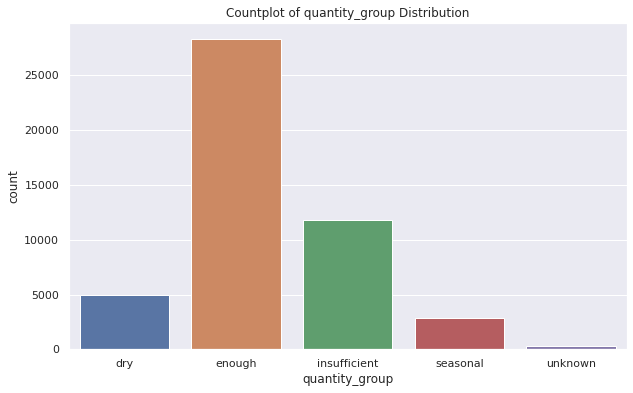

In [50]:
# countplot of quantity_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quantity_group', data=train_final).set_title("Countplot of quantity_group Distribution")
plt.show()

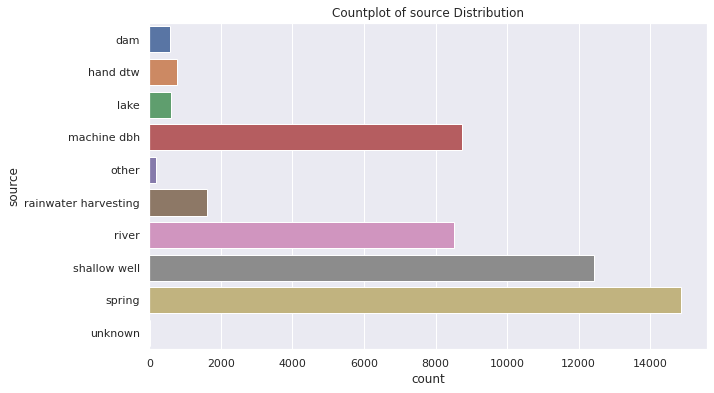

In [51]:
# countplot of source distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='source', data=train_final).set_title("Countplot of source Distribution")
plt.show()

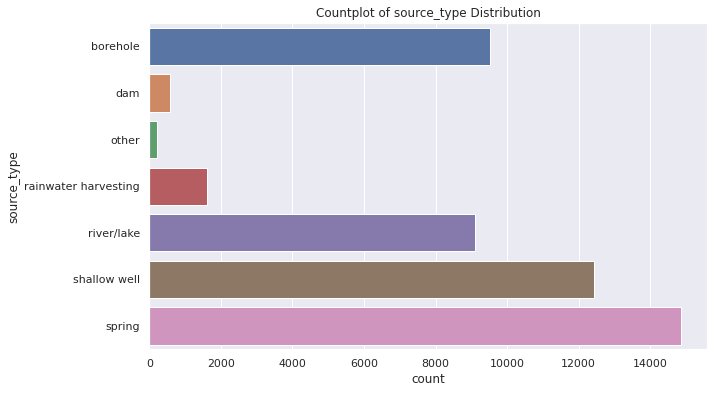

In [52]:
# countplot of source_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='source_type', data=train_final).set_title("Countplot of source_type Distribution")
plt.show()

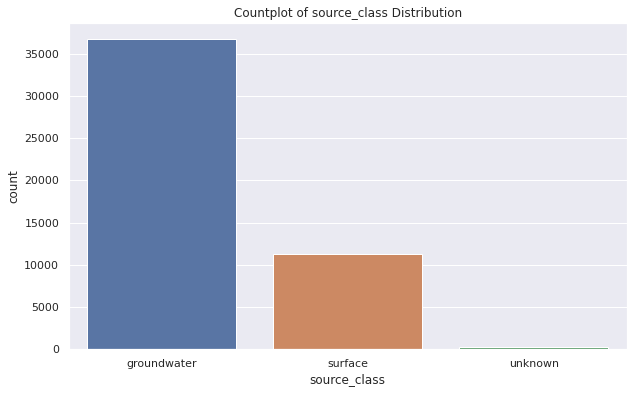

In [53]:
# countplot of source_class distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='source_class', data=train_final).set_title("Countplot of source_class Distribution")
plt.show()

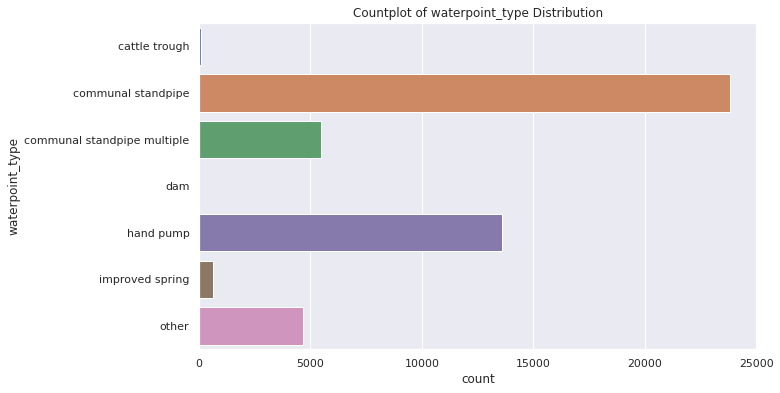

In [54]:
# countplot of waterpoint_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='waterpoint_type', data=train_final).set_title("Countplot of waterpoint_type Distribution")
plt.show()

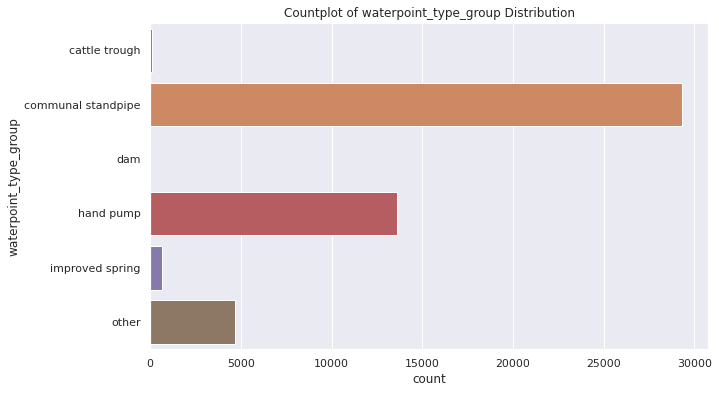

In [55]:
# countplot of waterpoint_type_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='waterpoint_type_group', data=train_final).set_title("Countplot of waterpoint_type_group Distribution")
plt.show()

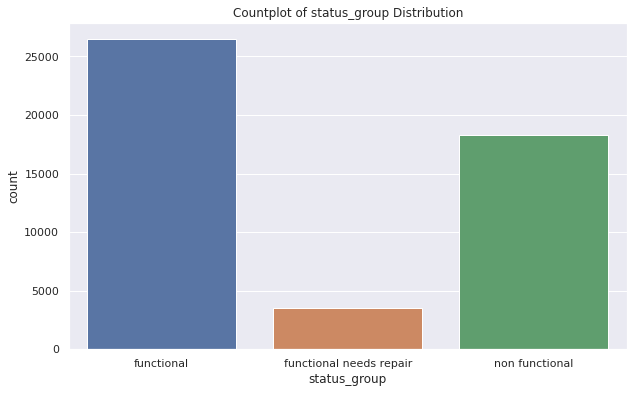

In [56]:
# countplot of status_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='status_group', data=train_final).set_title("Countplot of status_group Distribution")
plt.show()

### **Frequency Tables**

In [57]:
# frequency table of basin
train_final['basin'].value_counts().to_frame()

,basin
Pangani,8540
Lake Victoria,7319
Internal,6155
Rufiji,6031
Lake Tanganyika,5663
Wami / Ruvu,5127
Ruvuma / Southern Coast,3675
Lake Nyasa,3376
Lake Rukwa,2402


In [58]:
# frequency table of region
train_final['region'].value_counts().to_frame()

,region
Iringa,5220
Kilimanjaro,4206
Shinyanga,3680
Morogoro,2953
Kagera,2845
Arusha,2836
Kigoma,2774
Mbeya,2695
Tanga,2543
Pwani,2490


In [59]:
# frequency table of public_meeting
train_final['public_meeting'].value_counts().to_frame()

,public_meeting
True,43940
False,4348


In [60]:
# frequency table of recorded_by
train_final['recorded_by'].value_counts().to_frame()

,recorded_by
GeoData Consultants Ltd,48288


In [61]:
# frequency table of scheme_management
train_final['scheme_management'].value_counts().to_frame()

,scheme_management
VWC,32344
WUG,4237
Water authority,2913
WUA,2634
Water Board,2488
Parastatal,1294
Company,1028
Private operator,805
Other,376
SWC,97


In [62]:
# frequency table of permit
train_final['permit'].value_counts().to_frame()

,permit
True,33260
False,15028


In [63]:
# frequency table of extraction_type
train_final['extraction_type'].value_counts().to_frame()

,extraction_type
gravity,23036
nira/tanira,6260
other,4538
submersible,3645
swn 80,2858
mono,2382
india mark ii,2047
afridev,1346
ksb,1330
other - rope pump,212


In [64]:
# frequency table of extraction_type_group
train_final['extraction_type_group'].value_counts().to_frame()

,extraction_type_group
gravity,23036
nira/tanira,6260
submersible,4975
other,4538
swn 80,2858
mono,2382
india mark ii,2047
afridev,1346
other handpump,322
rope pump,212


In [65]:
# frequency table of extraction_type_class
train_final['extraction_type_class'].value_counts().to_frame()

,extraction_type_class
gravity,23036
handpump,12920
submersible,4975
other,4538
motorpump,2503
rope pump,212
wind-powered,104


In [66]:
# frequency table of management
train_final['management'].value_counts().to_frame()

,management
vwc,33577
wug,4807
water board,2665
wua,2288
private operator,1479
parastatal,1331
water authority,790
company,654
other,449
other - school,99


In [67]:
# frequency table of management_group
train_final['management_group'].value_counts().to_frame()

,management_group
user-group,43337
commercial,2998
parastatal,1331
other,548
unknown,74


In [68]:
# frequency table of payment
train_final['payment'].value_counts().to_frame()

,payment
never pay,20690
pay per bucket,7897
pay monthly,7542
unknown,4172
pay when scheme fails,3642
pay annually,3417
other,928


In [69]:
# frequency table of payment_type
train_final['payment_type'].value_counts().to_frame()

,payment_type
never pay,20690
per bucket,7897
monthly,7542
unknown,4172
on failure,3642
annually,3417
other,928


In [70]:
# frequency table of water_quality
train_final['water_quality'].value_counts().to_frame()

,water_quality
soft,42667
salty,3718
unknown,880
coloured,320
milky,299
salty abandoned,231
fluoride,160
fluoride abandoned,13


In [71]:
# frequency table of quality_group
train_final['quality_group'].value_counts().to_frame()

,quality_group
good,42667
salty,3949
unknown,880
colored,320
milky,299
fluoride,173


In [72]:
# frequency table of quantity
train_final['quantity'].value_counts().to_frame()

,quantity
enough,28355
insufficient,11799
dry,4945
seasonal,2899
unknown,290


In [73]:
# frequency table of quantity_group
train_final['quantity_group'].value_counts().to_frame()

,quantity_group
enough,28355
insufficient,11799
dry,4945
seasonal,2899
unknown,290


In [74]:
# frequency table of source
train_final['source'].value_counts().to_frame()

,source
spring,14852
shallow well,12415
machine dbh,8730
river,8506
rainwater harvesting,1607
hand dtw,779
lake,604
dam,581
other,182
unknown,32


In [75]:
# frequency table of source_type
train_final['source_type'].value_counts().to_frame()

,source_type
spring,14852
shallow well,12415
borehole,9509
river/lake,9110
rainwater harvesting,1607
dam,581
other,214


In [76]:
# frequency table of source_class
train_final['source_class'].value_counts().to_frame()

,source_class
groundwater,36776
surface,11298
unknown,214


In [77]:
# frequency table of waterpoint_type
train_final['waterpoint_type'].value_counts().to_frame()

,waterpoint_type
communal standpipe,23837
hand pump,13602
communal standpipe multiple,5459
other,4651
improved spring,651
cattle trough,82
dam,6


In [78]:
# frequency table of waterpoint_type_group
train_final['waterpoint_type_group'].value_counts().to_frame()

,waterpoint_type_group
communal standpipe,29296
hand pump,13602
other,4651
improved spring,651
cattle trough,82
dam,6


In [79]:
# frequency table of waterpoint_type
train_final[['waterpoint_type','waterpoint_type_group']].value_counts().to_frame()

,,0
waterpoint_type,waterpoint_type_group,
communal standpipe,communal standpipe,23837
hand pump,hand pump,13602
communal standpipe multiple,communal standpipe,5459
other,other,4651
improved spring,improved spring,651
cattle trough,cattle trough,82
dam,dam,6


In [80]:
# frequency table of status_group
train_final['status_group'].value_counts().to_frame()

,status_group
functional,26517
non functional,18273
functional needs repair,3498


### **Pie Charts**

### **Measures of Central Tendency**

In [81]:
# assigning numerical columns
numerical_cols = train_final[['amount_water_available','altitude_of_well',"construction_year","population"]]

**Mode and median**

In [82]:
#mode and median
for col in numerical_cols:
  print("mode")
  print("Variable:",col)
  print(train_final[col].mode())
  print("median")
  print(train_final[col].median())
  print("\n")

mode
Variable: amount_water_available
0    0.0
dtype: float64
median
0.0


mode
Variable: altitude_of_well
0    0
dtype: int64
median
463.0


mode
Variable: construction_year
0    0
dtype: int64
median
1987.0


mode
Variable: population
0    0
dtype: int64
median
30.0




### **Measures of central dispersion**

**Variance**

In [83]:
#variance
numerical_cols.var().to_frame(name="Variance")

,Variance
amount_water_available,8.000056e+06
altitude_of_well,4.883371e+05
construction_year,8.782435e+05
population,2.232614e+05


**Standard Deviation**

In [84]:
#standard deviation
numerical_cols.std().to_frame(name="Standard Deviation")

,Standard Deviation
amount_water_available,2828.437040
altitude_of_well,698.811196
construction_year,937.146464
population,472.505399


**Range**

In [85]:
#range
max = numerical_cols.max()
min = numerical_cols.min()
range= max - min
range.to_frame(name="Range")

,Range
amount_water_available,250000.0
altitude_of_well,2860.0
construction_year,2013.0
population,30500.0


**Quantiles**

In [86]:
#quantiles
numerical_cols.quantile([0.25,0.50,0.75])

,amount_water_available,altitude_of_well,construction_year,population
0.25,0.0,0.0,0.0,0.0
0.50,0.0,463.0,1987.0,30.0
0.75,50.0,1335.0,2005.0,200.0


**Skewness**

In [87]:
skewness = numerical_cols.skew().reset_index(name="Skewness Value")
skewness.rename(columns={"index":"numerical columns"},inplace=True)
skewness.loc[skewness["Skewness Value"]==0,"Distribution"] ="Symmetric"
skewness.loc[skewness["Skewness Value"] > 0, "Distribution"] = "Positively Skewed"
skewness.loc[skewness["Skewness Value"] < 0, "Distribution"] = "Negatively Skewed"
skewness

,numerical columns,Skewness Value,Distribution
0,amount_water_available,43.636911,Positively Skewed
1,altitude_of_well,0.407391,Positively Skewed
2,construction_year,-0.734702,Negatively Skewed
3,population,13.617763,Positively Skewed


**Kurtosis**

In [88]:
kurtosis = numerical_cols.kurt().reset_index(name="Kurtosis Distribution")
kurtosis.rename(columns = {"index":"numerical_columns"},inplace=True)
kurtosis.loc[kurtosis['Kurtosis Distribution'] == 0,'Status'] = "Mesokurtic"
kurtosis.loc[kurtosis['Kurtosis Distribution'] > 0,'Status'] = "Leptokurtic"
kurtosis.loc[kurtosis['Kurtosis Distribution'] < 0,'Status'] = "Platykurtic"
kurtosis

,numerical_columns,Kurtosis Distribution,Status
0,amount_water_available,2700.130507,Leptokurtic
1,altitude_of_well,-1.304546,Platykurtic
2,construction_year,-1.459726,Platykurtic
3,population,465.347475,Leptokurtic


## **Bivariate Analysis**



### **Geographical Maps**

In [89]:
import plotly.express as px
import pandas as pd

fig = px.density_mapbox(train_final,lat="latitude",lon="longitude",z="amount_water_available",
                        radius=10,center=dict(lat=0,lon=180),zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()